In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

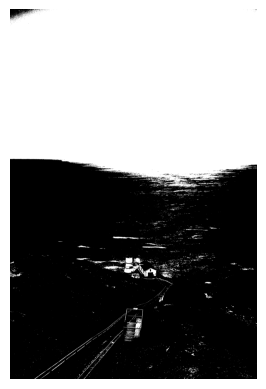

In [71]:
im_gray = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)
# im_gray = cv.imread('shehab.png', cv.IMREAD_GRAYSCALE)

# plt.imshow(im_gray, cmap='gray')
# plt.axis('off')
# plt.show()
# print("Image shape:", im_gray.shape)

thresh, im_bw = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
thresh = 70
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]

plt.imshow(im_bw, cmap='gray')
plt.axis('off')
plt.show()


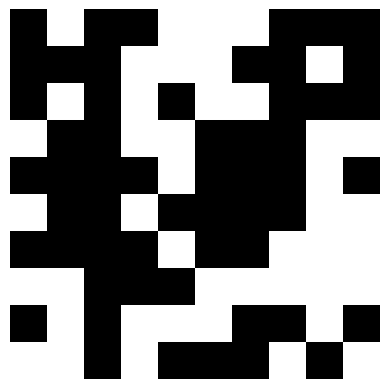

In [75]:
width = 400
height = 400

block_size = 40
num_blocks_x = width // block_size
num_blocks_y = height // block_size

image = np.ones((height, width), dtype=np.uint8) * 255

for i in range(num_blocks_y):
    for j in range(num_blocks_x):
        block_type = np.random.choice(['white', 'black', 'mixed'], p=[0.4, 0.4, 0.2])
        if block_type == 'white':
            image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = 255
        elif block_type == 'black':
            image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = 0
        elif block_type == 'mixed':
            image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = np.random.choice([0, 255])

cv.imwrite("random_image.png", image)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [85]:
def decimalToBinary(n):
    return bin(n).replace("0b", "")


print(decimalToBinary(8))
class CAC:
    w,h=0,0
    def __init__(self):



1000
